# Import

In [76]:
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Set Path and Get data

In [77]:
#path = "C:\\Users\\niels\\Downloads\\GRN_system_runs\\Evolution\\GIFs\\6.197483584028902"#10.727024154887758"
path = "C:\\Users\\niels\Downloads\\GRN_runs\GIFs\\7.165378376811813"

# Spider: 6.900156503920964", Snake: 9.93067072271658, Different: 6.9331836719167415
# Load the data
locations = np.loadtxt(f"{path}\\locations.csv",
                  delimiter = ',')

concentrations = {}
for tf in range(1, 6):
    concentrations[tf] = np.loadtxt(f"{path}\\concentrations_GRN_TF{tf}.csv",
                   delimiter = ',')
    # concentrations[tf] = np.loadtxt(f"{path}\\concentrations_TF{tf}.csv",
    #              delimiter = ',')


#[cell.developed_module.substrate_coordinates[0], cell.developed_module.substrate_coordinates[1], 
#        slot4coordinates, potential_module_coord[0], potential_module_coord[1]]

# FRONT = 0
# RIGHT = 1
# BACK = 2
# LEFT = 3

# Convert to grid

In [78]:
coordinates, directions = [], {}
# Append core coordinates --> 3 x 3 central grid
for coord in [(-1, -1), (-1, 1), (1, -1), (1, 1), (0, 0)]:
    coordinates.append([coord[0], coord[1]])

xbounds = [0, 0]
ybounds = [0, 0]
for loc in locations:
    coordinates.append([loc[3], loc[4]])
    directions[tuple(coordinates[-1])] = {0: (int(np.sign(loc[3] - loc[0])), int(np.sign(loc[4] - loc[1])))}
    directions[tuple(coordinates[-1])][2] = (-int(np.sign(loc[3] - loc[0])), -int(np.sign(loc[4] - loc[1])))
    
    if (directions[tuple(coordinates[-1])][0] == (1, 0)):
        directions[tuple(coordinates[-1])][1] = (0, 1)
        directions[tuple(coordinates[-1])][3] = (0, -1)
    elif (directions[tuple(coordinates[-1])][0] == (0, 1)):
        directions[tuple(coordinates[-1])][1] = (-1, 0)
        directions[tuple(coordinates[-1])][3] = (1, 0)
    elif (directions[tuple(coordinates[-1])][0] == (-1, 0)):
        directions[tuple(coordinates[-1])][1] =  (0, -1)
        directions[tuple(coordinates[-1])][3] = (0, 1)
    elif (directions[tuple(coordinates[-1])][0] == (0, -1)):
        directions[tuple(coordinates[-1])][1] = (1, 0)
        directions[tuple(coordinates[-1])][3] = (-1, 0)
    else:
        print("Error")

    
    # x-coordinate
    try:
        assert directions[tuple(coordinates[-1])][0][0] + loc[0] == loc[3]
    except:
        assert directions[tuple(coordinates[-1])][0][0] * 2 + loc[0] == loc[3]
    # y-coordinate
    try:
        assert directions[tuple(coordinates[-1])][0][1] + loc[1] == loc[4]
    except:
        assert directions[tuple(coordinates[-1])][0][1] * 2 + loc[1] == loc[4]

    
    # Store bounds
    if loc[3] < xbounds[0]:
        xbounds[0] = loc[3]
    if loc[3] > xbounds[1]:
        xbounds[1] = loc[3]
    if loc[4] < ybounds[0]:
        ybounds[0] = loc[4]
    if loc[4] > ybounds[1]:
        ybounds[1] = loc[4]

# Append slot coordinates
xbounds = [min([xbounds[0], - 1]), max([xbounds[1], 1])]
ybounds = [min([ybounds[0], - 1]), max([ybounds[1], 1])]

In [79]:
grid = np.ones((max([int(xbounds[1] - xbounds[0]) + 1, 3]), max([int(ybounds[1] - ybounds[0] + 1), 3])))

# Set to 0 if not in body
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if [i + xbounds[0], j + ybounds[0]] not in coordinates:
            grid[i, j] = 0


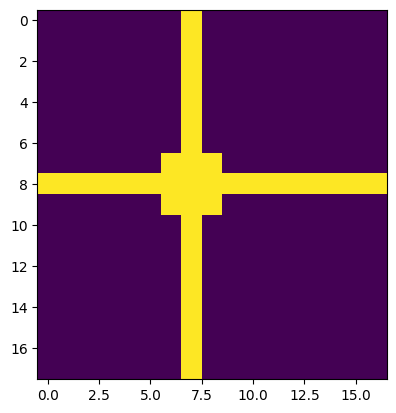

In [80]:
import matplotlib.pyplot as plt
plt.imshow(grid)

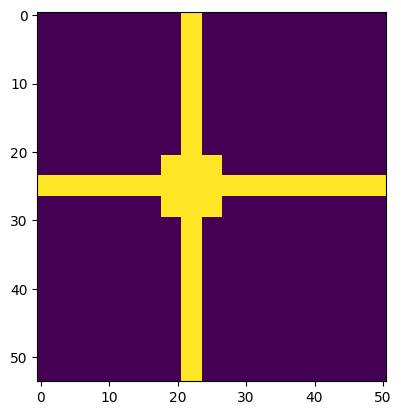

In [81]:
# Expand each grid cell to 3 x 3
expanded_grid = np.zeros((grid.shape[0] * 3, grid.shape[1] * 3))
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        expanded_grid[i * 3: (i + 1) * 3, j * 3: (j + 1) * 3] = grid[i, j]

plt.imshow(expanded_grid)

# Image of Concentrations over Time

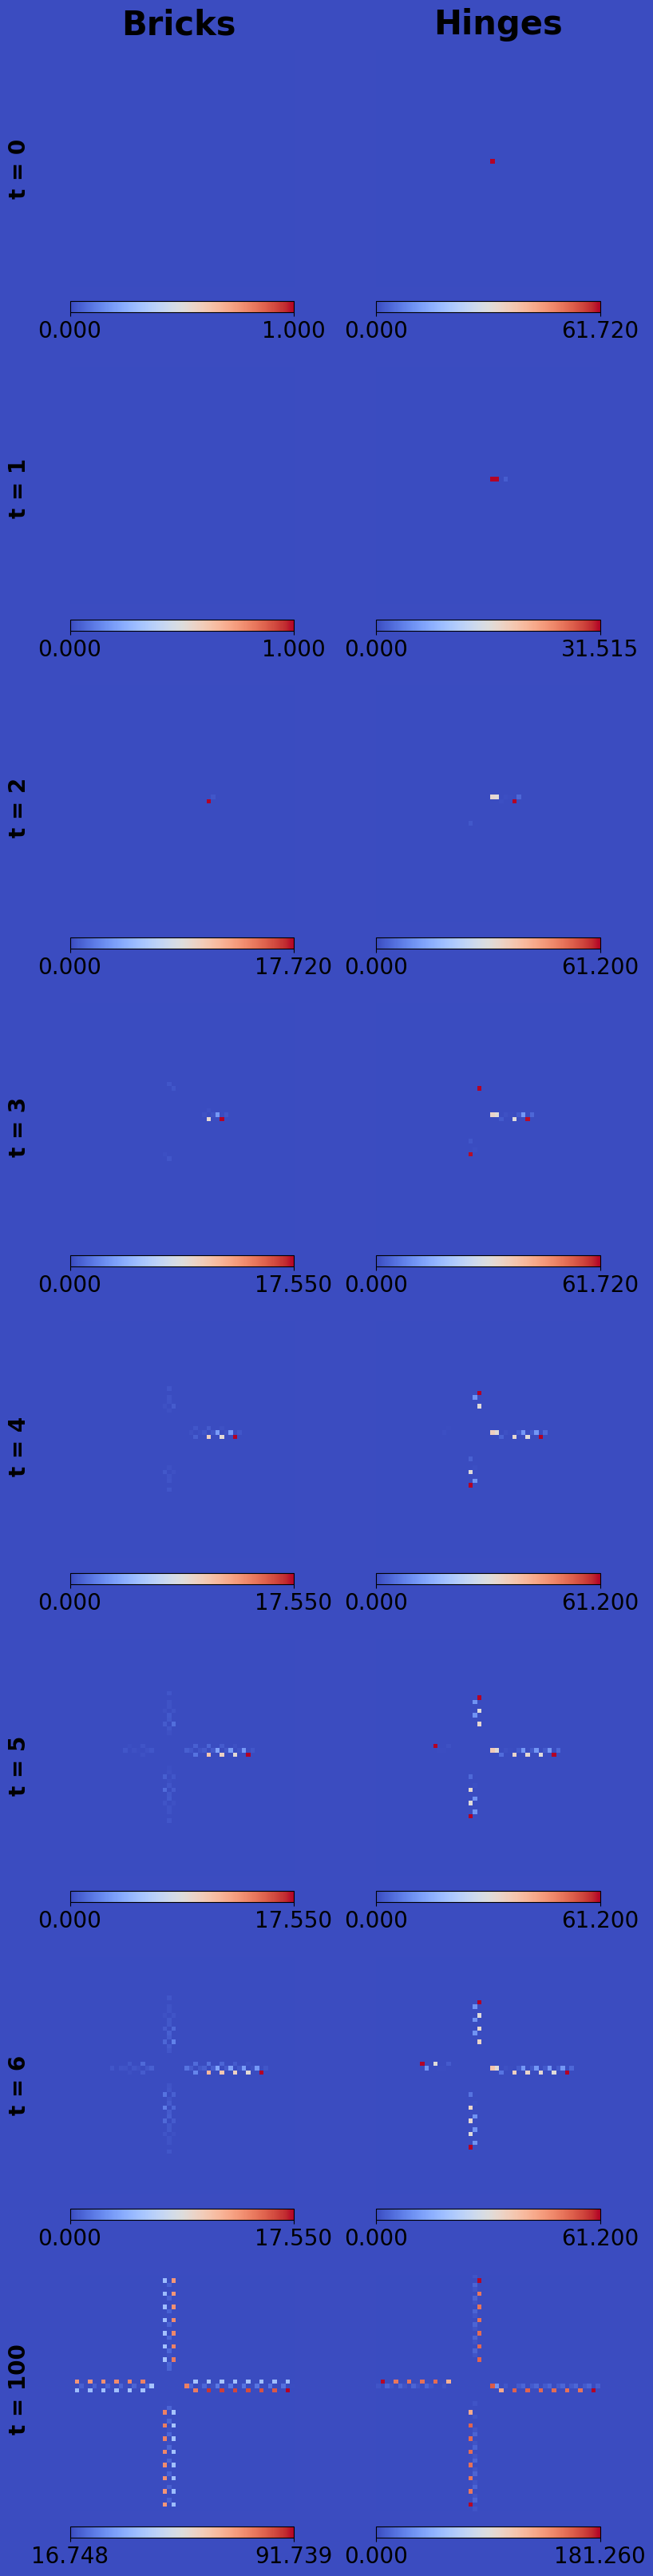

NameError: name 'hhkjk' is not defined

In [82]:
# ---- Plot
TFS = [3, 4]
gens = [0, 1, 2, 3, 4, 5, 6, 100]
# Initialize figure
fig, axes = plt.subplots(8, 2, figsize= (8, 32), facecolor = "white") # (8, 32)

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=8, hspace=None)
# Initialize color map and norm
cmap = plt.colormaps.get_cmap("coolwarm")

for igen, gen in enumerate(gens):
    # Get number of nodes
    node_est = []
    for tf in TFS: 
        new_idxs = np.argwhere([concentrations[tf][:, gen] != 0])
        if len(new_idxs) != 0: node_est.append(new_idxs)
        else: node_est.append(np.array([0] * len(TFS)))
    nnodes = np.max([idx.max() for idx in node_est])
    # Get min and max
    minval = [np.min(concentrations[tf][:(nnodes + 1), gen]).round(3) for tf in TFS]
    maxval = [np.max(concentrations[tf][:(nnodes + 1), gen]).round(3) for tf in TFS]
    # Correct for equal values
    for ival, val in enumerate(minval):
        if (minval[ival] == maxval[ival]) and (maxval[ival] != 0): minval[ival] = 0
        elif (minval[ival] == maxval[ival]) and (maxval[ival] == 0): maxval[ival] = 1

    # Loop over the TFs
    for itf, tf in enumerate(TFS):#range(1, 6):
        # Initialize grid
        expanded_grid = np.zeros((grid.shape[0] * 3, grid.shape[1] * 3))

        # Set the concentrations on an expanded grid for TF1
        middle_core = 0
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                # # Save core index?
                # if (i + xbounds[0], j + ybounds[0]) == (0, 0):
                #     core_index = [i * 3, j * 3]
                
                if (grid[i, j] == 1) and ((i + xbounds[0], j + ybounds[0]) not in [(1, 0), (0, 1),
                                                        (-1, 0), (0, -1), (1, 1), (-1, -1), (-1, 1), (1, -1)]):
                    # Get index of the coordinates
                    idx_coordinates = coordinates.index([i + xbounds[0], j + ybounds[0]])
                    idx = idx_coordinates - 8 # Subtract 8 to get the correct index for the concentrations
                    
                    # Check if core
                    if idx <= 0:
                        bool_core = True
                    else:
                        bool_core = False

                    # Tijdelijk --> core nog toevoegen
                    if not bool_core:
                        for c in range(4):
                            row = i * 3 + 1 + directions[tuple(coordinates[idx_coordinates])][c][0]
                            col = j * 3 + 1 + directions[tuple(coordinates[idx_coordinates])][c][1]
                            expanded_grid[row, col] = concentrations[tf][int(idx * 4 + c), gen].round(3)
                    else:
                        for c in range(4):
                            if c == 0: 
                                row = i * 3 + 2 + 3
                                col = j * 3 + 1 + 0
                            elif c == 3: # Somehow left and right are switched
                                row = i * 3 + 1 + 0
                                col = j * 3 + 2 + 3
                            elif c == 2:
                                row = i * 3 - 3
                                col = j * 3 + 1 + 0
                            elif c == 1:
                                row = i * 3 + 1 + 0
                                col = j * 3 - 3
                            #expanded_grid[row:int(row + 3), col:int(col + 3)] = concentrations[tf][int(idx * 4), gen]
                            expanded_grid[row,col] = concentrations[tf][c, gen].round(3)
                            #middle_core += 0.25 * concentrations[tf][c, gen]
                        #expanded_grid[i * 3 + 1, j * 3 + 1] = middle_core.round(2)
            
        #expanded_grid[core_index[0]:core_index[0] + 3, core_index[1]:core_index[1] + 3] = middle_core
        # # ---- Plot
        # if igen == 0:
        #     expanded_grid = expanded_grid[15:-15, 15:-15]
        # elif igen == 1:
        #     expanded_grid = expanded_grid[15:-15, 15:-15]
        # elif igen == 2:
        #     expanded_grid = expanded_grid[15:-15, 15:-15]
        
        # # Get min and max rows and columns with values
        # if np.sum(expanded_grid) == 0: pass
        # else:
        #     rows = np.where(np.sum(expanded_grid, axis = 1) != 0)[0]
        #     cols = np.where(np.sum(expanded_grid, axis = 0) != 0)[0]
        #     expanded_grid = expanded_grid[rows[0]:rows[-1] + 1, cols[0]:cols[-1] + 1]
        # Get axis
        im = axes[igen, itf].imshow(expanded_grid, cmap = cmap, vmin = minval[itf], vmax = maxval[itf])

        # ---- Colorbar
        cbar = fig.colorbar(im, ax = axes[igen, itf], orientation = "horizontal", pad = 0.05)
        # Set colorbar ticks
        cbar.set_ticks([minval[itf], maxval[itf]])
        cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        cbar.ax.tick_params(labelsize = 20)
        
        # Plot min and max as text
        # ax.text(0, 0.9, f"Min: {minval[itf]:.2f}", 
        #         fontsize = 8, color = "black", transform = ax.transAxes, ha = "center")
        # ax.text(0, 0.85, f"Max: {maxval[itf]:.2f}",
        #         fontsize = 8, color = "black", transform = ax.transAxes, ha = "center")
        axes[igen, itf].axis("off")
        axes[igen, itf].set_aspect("equal")
        # Remove tick indicators
        axes[igen, itf].set_xticks([])
        axes[igen, itf].set_yticks([])

    # # ---- Set last figure blank
    # ax[5].axis("off")
    # ax[5].set_aspect("equal")
    # ax[5].set_xticklabels([])
    # ax[5].set_yticklabels([])
    # # Remove tick indicators
    # ax[5].set_xticks([])
    # ax[5].set_yticks([])

# ---- Text
for itf, tf in enumerate(TFS):
    fig.text((itf + 0.5) / 2, 1, {3: "Bricks", 4: "Hinges"}[tf], 
                        fontsize = 30, color = "black", fontweight = "bold", ha = "center")
for igen, gen in enumerate(gens):
    fig.text(0, 1  - ((igen + 0.5) / len(gens)), f"t = {gen}", 
            fontsize = 20, rotation = 90, color = "black", fontweight = "bold",
            ha = "center")

# ---- Return
plt.subplots_adjust(hspace = 0, wspace = 0)
plt.tight_layout()
plt.margins(0, 0)
# Background color
fig.patch.set_facecolor(cmap(0))
plt.show()
hhkjk


# GIF of Concentrations over Time

In [ ]:
# Write gif of the concentrations --> normalized per timestep
import gif

# ---- Settings
TFS = [1, 2, 3, 4, 5]
figsize = 5
# Initialize color map
cmap = plt.colormaps.get_cmap("coolwarm")

@gif.frame
def animate(gen):
    # Initialize figure
    fig, axes = plt.subplots(1, len(TFS), figsize= (20, figsize), facecolor = "white") # snakes: (20, 20)

    # Get number of nodes
    node_est = []
    for tf in TFS: 
        new_idxs = np.argwhere([concentrations[tf][:, gen] != 0])
        if len(new_idxs) != 0: node_est.append(new_idxs)
        else: node_est.append(np.array([0] * len(TFS)))
    nnodes = np.max([idx.max() for idx in node_est])
    # Get min and max
    minval = [np.min(concentrations[tf][:(nnodes + 1), gen]).round(3) for tf in TFS]
    maxval = [np.max(concentrations[tf][:(nnodes + 1), gen]).round(3) for tf in TFS]
    # Correct for equal values
    for ival, val in enumerate(minval):
        if (minval[ival] == maxval[ival]) and (maxval[ival] != 0): minval[ival] = 0
        elif (minval[ival] == maxval[ival]) and (maxval[ival] == 0): maxval[ival] = 1

    # Loop over the TFs
    for itf, tf in enumerate(TFS):#range(1, 6):
        # Initialize grid
        expanded_grid = np.zeros((grid.shape[0] * 3, grid.shape[1] * 3))

        # Set the concentrations on an expanded grid for TF1
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if (grid[i, j] == 1) and ((i + xbounds[0], j + ybounds[0]) not in [(1, 0), (0, 1),
                                                        (-1, 0), (0, -1), (1, 1), (-1, -1), (-1, 1), (1, -1)]):
                    # Get index of the coordinates
                    idx_coordinates = coordinates.index([i + xbounds[0], j + ybounds[0]])
                    idx = idx_coordinates - 8 # Subtract 8 to get the correct index for the concentrations
                    
                    # Check if core
                    if idx <= 0:
                        bool_core = True
                    else:
                        bool_core = False

                    # Tijdelijk --> core nog toevoegen
                    if not bool_core:
                        for c in range(4):
                            row = i * 3 + 1 + directions[tuple(coordinates[idx_coordinates])][c][0]
                            col = j * 3 + 1 + directions[tuple(coordinates[idx_coordinates])][c][1]
                            expanded_grid[row, col] = concentrations[tf][int(idx * 4 + c), gen].round(3)
                    else:
                        for c in range(4):
                            if c == 0: 
                                row = i * 3 + 2 + 3
                                col = j * 3 + 1 + 0
                            elif c == 3: # Somehow left and right are switched
                                row = i * 3 + 1 + 0
                                col = j * 3 + 2 + 3
                            elif c == 2:
                                row = i * 3 - 3
                                col = j * 3 + 1 + 0
                            elif c == 1:
                                row = i * 3 + 1 + 0
                                col = j * 3 - 3
                        
                            expanded_grid[row,col] = concentrations[tf][c, gen].round(3)
        # Add rows to top of expanded grid
        expanded_grid = np.vstack((np.zeros((10, expanded_grid.shape[1])), expanded_grid))

        # Get axis
        im = axes[itf].imshow(expanded_grid, cmap = cmap, vmin = minval[itf], vmax = maxval[itf])

        # ---- Colorbar
        cbar = fig.colorbar(im, ax = axes[itf], orientation = "horizontal", pad = 0.05)
        # Set colorbar ticks
        cbar.set_ticks([minval[itf], maxval[itf]])
        cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        cbar.ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        
        # Plot min and max as text
        # ax.text(0, 0.9, f"Min: {minval[itf]:.2f}", 
        #         fontsize = 8, color = "black", transform = ax.transAxes, ha = "center")
        # ax.text(0, 0.85, f"Max: {maxval[itf]:.2f}",
        #         fontsize = 8, color = "black", transform = ax.transAxes, ha = "center")
        axes[itf].axis("off")
        axes[itf].set_aspect("equal")
        # Remove tick indicators
        axes[itf].set_xticks([])
        axes[itf].set_yticks([])
    
    # ---- Text
    fontsize = 24 if figsize == 20 else 12
    if figsize == 20: 
        loc = 0.1 
    else: loc = 0.05
    fig.text(0.2 / len(TFS), loc, f"Time: {gen}", 
                            fontsize = fontsize, color = "black", fontweight = "bold", ha = "center")
    for itf, tf in enumerate(TFS):
        fig.text((itf + 0.5) / len(TFS), 0.97, {1: "rTF1", 2: "rTF2", 
                                      3: "Bricks", 4: "Hinges", 5: "Rotation"}[tf], 
                            fontsize = fontsize, color = "black", fontweight = "bold", ha = "center")
    

    # ---- Return
    plt.subplots_adjust(hspace = 0, wspace = 0)
    plt.tight_layout()
    # Background color
    fig.patch.set_facecolor(cmap(0))

frames = []
for i in range(0, concentrations[1].shape[1]):
    # Print progress
    print(f"Frame {i} of {concentrations[1].shape[1]}", end = "\r")
    # Append
    frames.append(animate(i))
    
# ----- Export gif
gif.save(frames, f"Tfs.gif", duration = 300)
